<a href="https://colab.research.google.com/github/oyeankit/Detecting-Fraud-Using-Machine-Learning-and-Data-Visualization/blob/main/Fraud_and_Non_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [42]:
# Loading the dataset
file_path = "/content/PS_20174392719_1491204439457_log.csv"
df = pd.read_csv(file_path)

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

print("Numeric features:", numeric_features.tolist())
print("Categorical features:", categorical_features.tolist())

# Creating preprocessor with updated OneHotEncoder parameters
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Apply SMOTE to train data
smote = SMOTE(random_state=42)
X_train_clean[col] = X_train_clean[col].fillna(X_train_clean[col].mode()[0])

# Train the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

Numeric features: ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
Categorical features: ['type']


In [61]:
# For Inspection
print(df.head())

# Data Preprocessing
# Features and target
X = df.drop(['isFraud', 'nameOrig', 'nameDest', 'step'], axis=1)  # Drop unnecessary columns
y = df['isFraud']

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0             0.0  
1  M2044282225             0.0             0.0        0             0.0  
2   C553264065             0.0             0.0        1             0.0  
3    C38997010         21182.0             0.0        1             0.0  
4  M1230701703             0.0             0.0        0             0.0  


In [62]:
#  'type' column using OneHotEncoder
categorical_features = ['type']
numerical_features = [col for col in X.columns if col not in categorical_features]

In [63]:
# Numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [64]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

In [65]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)

In [48]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
# Clean Y_train (target variable)
# Remove rows where Y_train has NaN values
valid_mask = y_train.notna()
X_train_clean = X_train[valid_mask]
Y_train_clean = y_train[valid_mask]

# Handle any remaining NaN values in X_train
# For numeric columns
numeric_columns = X_train_clean.select_dtypes(include=['int64', 'float64']).columns
X_train_clean[numeric_columns] = X_train_clean[numeric_columns].fillna(X_train_clean[numeric_columns].mean())

# For categorical columns
categorical_columns = X_train_clean.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train_clean[col] = X_train_clean[col].fillna(X_train_clean[col].mode()[0])

# Verify no NaN values remain
print("\nAfter cleaning:")
print("NaN values in X_train:", X_train_clean.isnull().sum().sum())
print("NaN values in Y_train:", Y_train_clean.isnull().sum())


After cleaning:
NaN values in X_train: 0
NaN values in Y_train: 0


In [67]:
# Apply SMOTE again
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Convertion of DataFrame to maintain column names
X_train_resampled = pd.DataFrame(X_train, columns=X_train_clean.columns)

# Print results
print("\nShapes:")
print("Original:", X_train.shape, y_train.shape)
print("After cleaning:", X_train_clean.shape, Y_train_clean.shape)
print("After SMOTE:", X_train_resampled.shape, y_train.shape)

print("\nClass distribution:")
print("Original:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_train).value_counts())


Shapes:
Original: (1009192, 7) (1009192,)
After cleaning: (1153362, 7) (1153362,)
After SMOTE: (1009192, 7) (1009192,)

Class distribution:
Original:
 isFraud
0    1008087
1       1105
Name: count, dtype: int64

After SMOTE:
 isFraud
0    1008087
1       1105
Name: count, dtype: int64


In [72]:
# Model Training
# Create a Random Forest pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [75]:
# Train the model
model_pipeline.fit(X_train_resampled, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'isFlaggedFraud']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['type'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [76]:
# Model Evaluation
# Predictions and probabilities
y_pred = model_pipeline.predict(X_test)
y_proba = model_pipeline.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    432036
           1       0.95      0.71      0.81       475

    accuracy                           1.00    432511
   macro avg       0.97      0.85      0.90    432511
weighted avg       1.00      1.00      1.00    432511

AUC-ROC: 0.9773488685884363


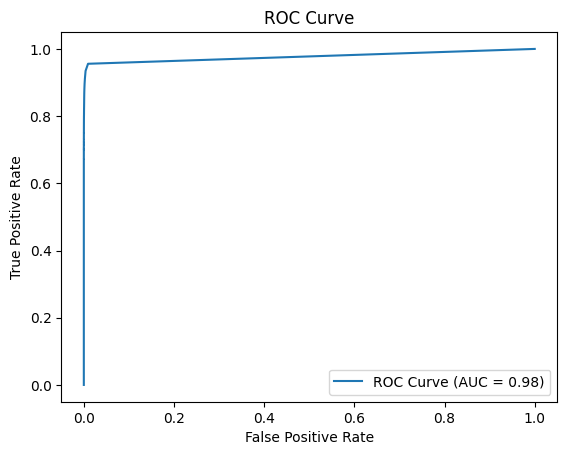

In [77]:
# Step 5: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [78]:
# Step 6: Export Results for Tableau
# Add predictions and probabilities to the original dataset
df['predicted'] = model_pipeline.predict(X)
df['probability'] = model_pipeline.predict_proba(X)[:, 1]

In [79]:
# Save to CSV for Tableau
df.to_csv('model_results_for_tableau.csv', index=False)
print("Model results saved to 'model_results_for_tableau.csv'")

Model results saved to 'model_results_for_tableau.csv'
